# Seattle Used Car Analysis Report
**By Lakshay Goyal | Division A**

In [1]:
# Project Setup
import pandas as pd

In [2]:
# Import our dataset
cars_df = pd.read_csv("seattle_car_fax_cleaned.csv")

# Print 5 rows in the dataset
cars_df.head(5)

,model_full_name,year,brand,sub_model,value_type,engine,miles,price
0,2018 Kia Niro EX Premium,2018,Kia,Niro,great Value,4 Cyl 1.6 L,41599,25735
1,2019 Volkswagen Jetta S,2019,Volkswagen,Jetta,great Value,NaN,11535,20797
2,2018 Toyota Highlander XLE,2018,Toyota,Highlander,great Value,NaN,56011,34290
3,2016 Subaru WRX Premium,2016,Subaru,WRX,great Value,NaN,82286,23995
4,2018 Jeep Wrangler Sahara,2018,Jeep,Wrangler,great Value,NaN,18423,45380


In [3]:
# Calculating the Rows
total_rows = len(cars_df)
total_rows

5000

# Finding & Removing Duplicates

In [4]:
cars_df.sort_values(["model_full_name", "year", "miles"])

,model_full_name,year,brand,sub_model,value_type,engine,miles,price
2040,2000 Chevrolet Monte Carlo SS,2000,Chevrolet,Monte,great Value,NaN,124225,5995
2065,2000 Chevrolet Monte Carlo SS,2000,Chevrolet,Monte,great Value,NaN,124225,5995
2090,2000 Chevrolet Monte Carlo SS,2000,Chevrolet,Monte,great Value,NaN,124225,5995
2115,2000 Chevrolet Monte Carlo SS,2000,Chevrolet,Monte,great Value,NaN,124225,5995
2140,2000 Chevrolet Monte Carlo SS,2000,Chevrolet,Monte,great Value,NaN,124225,5995
...,...,...,...,...,...,...,...,...
2883,2021 Toyota Venza XLE,2021,Toyota,Venza,great Value,NaN,1964,41586
2908,2021 Toyota Venza XLE,2021,Toyota,Venza,great Value,NaN,1964,41586
7,2021 Volkswagen Jetta S,2021,Volkswagen,Jetta,great Value,NaN,6198,21759
116,2022 Infiniti QX55 Luxe,2022,Infiniti,QX55,great Value,NaN,3050,45991


In [5]:
# Calculating the total duplicates for each unique vehicle
dup_df = cars_df.groupby(["model_full_name", "year", "miles"]).agg(total_occurences =("model_full_name", "count"))
dup_df.sort_values(["total_occurences"], ascending = False)

,,,total_occurences
model_full_name,year,miles,
2014 Lexus IS 250,2014,87066,97
2000 Chevrolet Monte Carlo SS,2000,124225,72
2020 Chevrolet Trax LS,2020,5999,72
2019 Chevrolet Colorado ZR2,2019,31332,72
2018 Dodge Charger GT,2018,33433,72
...,...,...,...
2018 Ford EcoSport Titanium,2018,32658,1
2018 Dodge Grand Caravan SXT,2018,81223,1
2018 Dodge Challenger SXT,2018,21823,1


In [6]:
# Removing the Duplicates
cars_df = cars_df.drop_duplicates(subset=["model_full_name", "year", "miles"])
print("There are", len(cars_df), "used cars for sale in Seattle")

There are 612 used cars for sale in Seattle


# Understanding Seattle Used Car Market

1. What is the most available brand of used cars?
2. What is the most available sub model of used cars?
3. What is the most available model of used cars?
4. What are the total cars for each value type in my dataset?

# What is the most available brand of used cars?

In [7]:
brand_df = cars_df.groupby(["brand"]).agg(total_occurences = ("brand", "count"),
                                         median_miles = ("miles", "median"),
                                         median_price = ("price", "median"))

brand_df.sort_values(["total_occurences"], ascending = False)

,total_occurences,median_miles,median_price
brand,,,
Toyota,81,24590.0,36500.0
Ford,62,33544.5,29489.5
Chevrolet,59,43379.0,28738.0
Honda,45,25125.0,28866.0
Jeep,38,47279.5,31566.0
Volkswagen,36,21830.5,23249.0
Hyundai,34,32857.5,20820.0
Subaru,33,25734.0,29695.0
Kia,31,28144.0,23588.0


# What is the most available sub model of used cars?

In [8]:
sub_model_df = cars_df.groupby(["sub_model", "brand"]).agg(total_occurences = ("brand", "count"),
                                         median_miles = ("miles", "median"),
                                         median_price = ("price", "median"))

sub_model_df.sort_values(["total_occurences"], ascending = False).head(25)

,,total_occurences,median_miles,median_price
sub_model,brand,,,
Wrangler,Jeep,15,57388.0,34900.0
Civic,Honda,14,30187.0,23996.5
Tacoma,Toyota,14,23112.0,37896.5
Jetta,Volkswagen,13,19143.0,20499.0
Silverado,Chevrolet,13,44378.0,39495.0
Highlander,Toyota,13,23235.0,38998.0
Grand,Jeep,12,33108.0,35940.0
Elantra,Hyundai,12,26730.0,18935.5
4Runner,Toyota,11,37505.0,44976.0


# What is the most available model of used cars?

In [9]:
model_df = cars_df.groupby(["model_full_name"]).agg(total_occurences = ("brand", "count"),
                                         median_miles = ("miles", "median"),
                                         median_price = ("price", "median"))
model_df.sort_values(["total_occurences"], ascending = False)

,total_occurences,median_miles,median_price
model_full_name,,,
2019 Toyota Highlander XLE,7,20866.0,39452.0
2019 Volkswagen Jetta S,5,19000.0,19988.0
2019 Mercedes-Benz C-Class C 300,4,27575.0,35990.0
2018 Toyota 4Runner Limited Edition,4,36441.5,44692.5
2019 Subaru Ascent Limited,4,24348.5,39116.0
...,...,...,...
2017 Hyundai Tucson SE,1,53643.0,21995.0
2017 Hyundai Tucson Limited Edition,1,35482.0,26750.0
2017 Hyundai Sonata Sport,1,83600.0,16488.0


# What are the total cars for each value type in my dataset?

In [10]:
value_df = cars_df.groupby(["value_type"]).agg(total_occurences = ("brand", "count"))
value_df.sort_values(["total_occurences"], ascending = False)

,total_occurences
value_type,
great Value,564
good Value,45
fair Value,3


# Which used car in Seattle we should consider for purchase and reselling?

**Criteria**

- Car must be a model from 2018 or after
- Car must have less than 40,000 miles
- Car must be a "Great Value"
- Car must either be Civic, Corolla, Crosstrek, Tucson, 1500, F-150

In [11]:
shortlist_df = cars_df.loc[(cars_df["year"]>=2018)
                        & (cars_df["miles"]<=40000)
                        & (cars_df["value_type"] == "great Value")
                        & ((cars_df["sub_model"] == "Corolla") |
                           (cars_df["sub_model"] == "Civic") |
                           (cars_df["sub_model"] == "Crosstrek") |
                           (cars_df["sub_model"] == "Tucson") |
                           (cars_df["sub_model"] == "1500") |
                           (cars_df["sub_model"] == "F-150"))]

print("We Should Consider the Following", len(shortlist_df), "Used Cars in Seattle:")
display(shortlist_df.sort_values(["price"]))

We Should Consider the Following 26 Used Cars in Seattle:


,model_full_name,year,brand,sub_model,value_type,engine,miles,price
19,2018 Honda Civic EX,2018,Honda,Civic,great Value,NaN,35249,22478
349,2019 Toyota Corolla SE,2019,Toyota,Corolla,great Value,NaN,25296,22997
455,2019 Honda Civic Sport,2019,Honda,Civic,great Value,NaN,16885,23995
241,2018 Hyundai Tucson Limited Edition,2018,Hyundai,Tucson,great Value,NaN,35154,23999
233,2020 Hyundai Tucson Value Edition,2020,Hyundai,Tucson,great Value,NaN,9106,24298
4787,2020 Toyota Corolla SE,2020,Toyota,Corolla,great Value,NaN,10055,24423
137,2019 Honda Civic Sport,2019,Honda,Civic,great Value,NaN,22124,24599
79,2021 Toyota Corolla SE,2021,Toyota,Corolla,great Value,NaN,8809,24891
211,2018 Honda Civic Touring,2018,Honda,Civic,great Value,NaN,20962,25984
88,2019 Hyundai Tucson SEL,2019,Hyundai,Tucson,great Value,NaN,22589,26995


# Finding the Best Honda Civic in the Market

In [15]:
shortlist_df = cars_df.loc[(cars_df["miles"]<=40000)
                         &(cars_df["year"]>=2018)
                         &(cars_df["value_type"] == "great Value")
                         & ((cars_df["sub_model"] == "Civic"))]

shortlist_df["miles_price_ratio"] = shortlist_df["miles"]/shortlist_df["price"]

print("There are", len(shortlist_df), "used Honda Civic in the market that meet our criteria. They are:")
display(shortlist_df.sort_values(["miles_price_ratio", "miles"]))

There are 8 used Honda Civic in the market that meet our criteria. They are:


<ipython-input-15-04da6959237c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shortlist_df["miles_price_ratio"] = shortlist_df["miles"]/shortlist_df["price"]


,model_full_name,year,brand,sub_model,value_type,engine,miles,price,miles_price_ratio
449,2021 Honda Civic Sport Touring,2021,Honda,Civic,great Value,NaN,5410,31648,0.170943
148,2020 Honda Civic Si,2020,Honda,Civic,great Value,NaN,6135,31171,0.196818
455,2019 Honda Civic Sport,2019,Honda,Civic,great Value,NaN,16885,23995,0.703688
211,2018 Honda Civic Touring,2018,Honda,Civic,great Value,NaN,20962,25984,0.806727
14,2019 Honda Civic Si,2019,Honda,Civic,great Value,NaN,24321,28995,0.838800
310,2018 Honda Civic Sport Touring,2018,Honda,Civic,great Value,NaN,25125,27988,0.897706
137,2019 Honda Civic Sport,2019,Honda,Civic,great Value,NaN,22124,24599,0.899386
19,2018 Honda Civic EX,2018,Honda,Civic,great Value,NaN,35249,22478,1.568156


# Build a Report Maker Function That Accepts a Year, Brand, and Sub Model and Create a nice report

In [38]:
def get_report(year, brand, sub_model):
   
    #Printing the Vehicle Name
    print("Vehicle Name:", year, brand, sub_model)
    
    #Creating a Dataframe that has allthe available used cars that meet the request
    request_df = cars_df.loc[(cars_df["year"] == year)
                &(cars_df["brand"]== brand)
                &(cars_df["sub_model"]== sub_model)]

     #Calculating the Total Available Cars, Median Miles of Available Cars, and Median Price of Available Car
    available_cars = len (request_df)
    print( "Cars Available:", available_cars)
    median_miles = request_df ["miles"].median()
    print("Median Miles", median_miles)
    median_price = request_df ["price"].median()
    print("Median Price", median_price)
    
    request_df["miles_price_ratio"] = request_df["miles"]/request_df["price"]
    
    print("The available vehicles are:")
    display(request_df)

    
    shortlist_df = request_df.loc[(request_df["miles"]<=45000) & (request_df["value_type"]== "great Value")]
    
    #Printing total shortlisted cars
    total_shortlisted_cars = len(shortlist_df)
    print("Our", total_shortlisted_cars, "recommendations are:")
    
    #Printing the shortlisted cars                                
    print(shortlist_df.sort_values(["miles_price_ratio"]).reset_index())
    
    #Printing a scatter plot of the cars in the market 
    print("Prices to Miles Relationship Scatter Plot")
    request_df.plot.scatter(x="miles", y="price", c="Red")

Vehicle Name: 2019 Toyota Highlander
Cars Available: 8
Median Miles 18772.5
Median Price 39720.0
The available vehicles are:


<ipython-input-38-5293ed8817e8>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  request_df["miles_price_ratio"] = request_df["miles"]/request_df["price"]


,model_full_name,year,brand,sub_model,value_type,engine,miles,price,miles_price_ratio
24,2019 Toyota Highlander XLE,2019,Toyota,Highlander,great Value,NaN,49309,37995,1.297776
39,2019 Toyota Highlander XLE,2019,Toyota,Highlander,great Value,NaN,34368,37000,0.928865
56,2019 Toyota Highlander XLE,2019,Toyota,Highlander,great Value,NaN,15154,39988,0.378964
173,2019 Toyota Highlander XLE,2019,Toyota,Highlander,great Value,NaN,16679,38998,0.427689
248,2019 Toyota Highlander SE,2019,Toyota,Highlander,good Value,NaN,10500,43995,0.238663
252,2019 Toyota Highlander XLE,2019,Toyota,Highlander,great Value,NaN,23235,39452,0.588944
272,2019 Toyota Highlander XLE,2019,Toyota,Highlander,great Value,NaN,20866,41257,0.505757
2941,2019 Toyota Highlander XLE,2019,Toyota,Highlander,great Value,NaN,11230,40899,0.274579


Our 6 recommendations are:
   index             model_full_name  year   brand   sub_model   value_type  \
0   2941  2019 Toyota Highlander XLE  2019  Toyota  Highlander  great Value   
1     56  2019 Toyota Highlander XLE  2019  Toyota  Highlander  great Value   
2    173  2019 Toyota Highlander XLE  2019  Toyota  Highlander  great Value   
3    272  2019 Toyota Highlander XLE  2019  Toyota  Highlander  great Value   
4    252  2019 Toyota Highlander XLE  2019  Toyota  Highlander  great Value   
5     39  2019 Toyota Highlander XLE  2019  Toyota  Highlander  great Value   

  engine  miles  price  miles_price_ratio  
0    NaN  11230  40899           0.274579  
1    NaN  15154  39988           0.378964  
2    NaN  16679  38998           0.427689  
3    NaN  20866  41257           0.505757  
4    NaN  23235  39452           0.588944  
5    NaN  34368  37000           0.928865  
Prices to Miles Relationship Scatter Plot


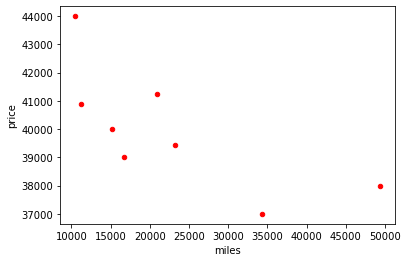

In [39]:
get_report(2019, "Toyota", "Highlander")